In [72]:
# load stuff:
import datetime as dt

from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

#import cartopy.crs as ccrs

from xhistogram.xarray import histogram

In [13]:
#load Datasets

#Global Params
SETNAME1="MERRA2"
FILES1="../Data/MERRA2_instM_3d_asm_Np_PS,RH,T/MERRA2_*"
DATALOC_SPECIFIC1 = 'MERRA2_instM_3d_asm_Np_PS,RH,T/'
DATALOC1 = '../Data/' + DATALOC_SPECIFIC1

SETNAME2="JRA-55"
FILES2="../Data/JRA-55_Monthly_1.25_Deg_isobaric/anl*"
DATALOC_SPECIFIC2 = 'JRA-55_Monthly_1.25_Deg_isobaric/'
DATALOC2 = '../Data/' + DATALOC_SPECIFIC2

RESLOC = '../DRHvsDT-Plots/'
RESLOC_SPECIFIC = ''

TOPOANALYSIS=True
MASKELEVATION=True


COMPARE = True
#Times for analysis
t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'

In [3]:
DS2 = Dataset(files=FILES1, setname = SETNAME1, dataloc = DATALOC1)
DS1 = Dataset(files=FILES2, setname = SETNAME2, dataloc = DATALOC2)

Loading full dataset MERRA2
[########################################] | 100% Completed | 6.10 ss
<xarray.Dataset>
Dimensions:  (time: 240, p: 42, lat: 361, lon: 576)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    PS       (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 22...
    Filename:                          MERRA2_100.instM_3d_asm_Np.198001.nc4
    Comment:                  

In [4]:
for DS in (DS1,DS2):
    if MASKELEVATION==True and DS.setname=='JRA-55':
        DS_2D = Dataset(files='../Data/JRA-55_Monthly_1.25_Deg_surface/*pres.nc', setname = 'JRA-55_2D', dataloc = '../Data/JRA-55_Monthly_1.25_Deg_surface/')
        DS.ds = elevation2nan( DS.ds, DS_2D.ds )
        print(DS.ds)

Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 101.03 ms
<xarray.Dataset>
Dimensions:  (time: 480, lon: 288, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    SP       (time, lat, lon) float32 dask.array<chunksize=(480, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jul 11 15:58:11 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
<xarray.Dataset>
Dimensions:  (time: 480, p: 37, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -17

In [5]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


Loading full dataset TOPO
[########################################] | 100% Completed | 101.20 ms
<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    topo     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 16:46:47 2023: cdo -f nc topo,r720x360 topo_r720...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...
<xarray.DataArray 'topo' (lat: 361, lon: 576)>
dask.array<getitem, shape=(361, 576), dtype=bool, chunksize=(361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 8

In [37]:
# =======================================================================
# Temp Trend in different latitudes, All in different subplots...

# =======================================================================
#A nice Plot function
plt.rcParams['axes.grid'] = True


def startfig(zones,heights,title,setname):

    cols = [f'Dataset {col}' for col in setname]

    rows = [f'Height = [{row[0]},{row[1]}]' for row in heights]

    fig, axes = plt.subplots(nrows=len(rows), ncols=len(cols), 
                             figsize=( 4* len(rows),3*len(cols)),
                             sharex=True, sharey=True,
                             constrained_layout=True,
                            )
    
    plt.setp(axes[:,0], ylabel=f'RH change in %/dec')
    plt.setp(axes[-1,:], xlabel='T change in K/dec')

    fig.suptitle(f'{title}',size='x-large',)

    pad = 5 # in points

    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                   )

    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center',
                   )
    
    
    
    
    return fig, axes
    
    
        
def endfig(fig, axes, name:str):
    
    #fig.tight_layout()
    #fig.subplots_adjust(left=0.15, top=0.95)
        
    plt.savefig(RESLOC+RESLOC_SPECIFIC+name,)#dpi=400
    
    plt.show()
    
    return


In [81]:
def getyear(string):
    date = dt.strptime(string, '%Y-%m-%d')
    return date.year

def makeDRHvsDT(zone,heights,ds_Tuple,titlesup,setname):

    fig, axes = startfig(zone,heights,f'Trendanalysis of {titlesup}',setname,)
    
    setnamenr=0
    inr=0
    
    for ds in ds_Tuple:
        
        jnr=0
        
        print(f"Process Dataset: {setname[inr]}")
        
        for j in heights:            
            with ProgressBar():
                da_raw = dask.compute(( ds.sel(time=slice(t2_start,t2_end),p=slice(j[0],j[1])).where((np.abs(ds.lat) >= zone[0]) & (np.abs(ds.lat) <= zone[1])).mean(("time"))
                                 - ds.sel(time=slice(t1_start,t1_end),p=slice(j[0],j[1])).where((np.abs(ds.lat) >= zone[0]) & (np.abs(ds.lat) <= zone[1])).mean(("time"))
                                 ).mean(("p")))[0]
            
            da = da_raw #( (getyear(t2_end)-getyear(t2_start))/2 - (getyear(t1_end)-getyear(t1_start))/2 ) #Factor of 10/35 = 0.2857 *  to convert to decades
            #da = da_raw.sel(p=slice(j[0],j[1])).mean(("p"))

            hist = histogram(da.T.where(~np.isnan(da.T)),da.RH.where(~np.isnan(ds.T)),  bins=[latbins, tbins])

            hist.T.plot(ax=axes[inr,jnr],yincrease=False,vmin=vmin, vmax=vmax, levels=levels,cmap=cmap)
            print(f"Done with height {j}")
            jnr=jnr+1
        inr=inr+1

    endfig(fig, axes, f"{RESLOC}{RESLOC_SPECIFIC}{titlesup}_Test.png")

In [82]:

# =======================================================================
# Plot DRH vs DT 
vmin=1
vmax=1500
levels=20
latbins = np.arange(-90,90,2)
tbins = np.arange(-50,35 , 1.5)

cmap='viridis'

zone=[-1,1]
heights=[[1000,1000],[950,900]]

In [ ]:

if COMPARE:
    makeDRHvsDT(zone,heights,ds_Tuple=(DS1.ds,DS2.ds),
                titlesup="Test",
                setname=(DS1.setname,DS2.setname),
               )


Process Dataset: JRA-55
[########################################] | 100% Completed | 77.86 s


Process zone: [0, 10]
[########################################] | 100% Completed | 4.35 sms
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 4.00 sms
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 3.98 sms
Done with [70, 90],[1000, 900]
Done with [70, 90],[800, 700]
Done with [70, 90],[500, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 37.69 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 36.08 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 

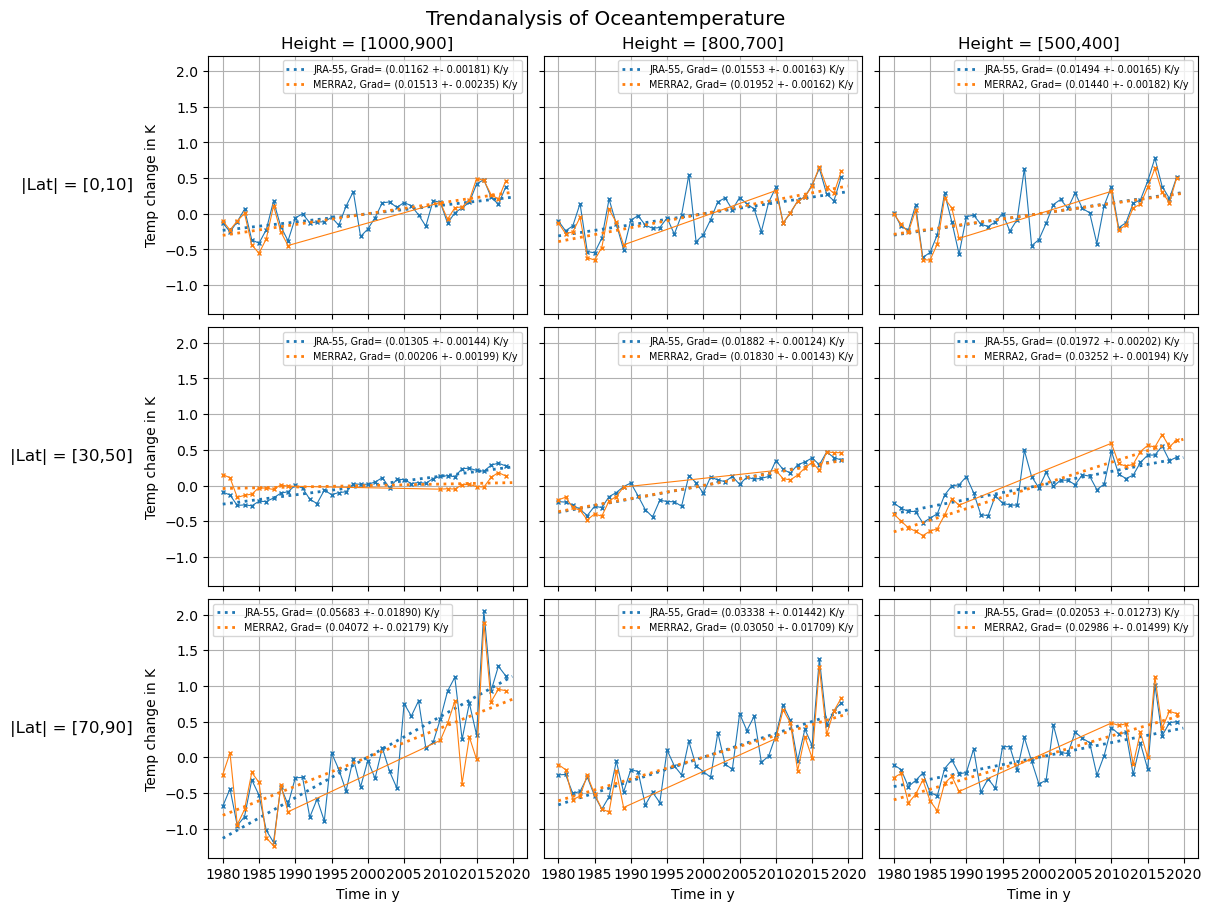

In [12]:
maketrendana(zones,heights,(DS1.ds.T.where(TOPO.land_mask_reindexed==False),DS2.ds.T.where(TOPO.land_mask_reindexed==False)),'Oceantemperature', ['Temp',"K"],"K",(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 4.21 sms
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 3.94 sms
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 4.04 sms
Done with [70, 90],[1000, 900]
Done with [70, 90],[800, 700]
Done with [70, 90],[500, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 43.80 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 43.49 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 

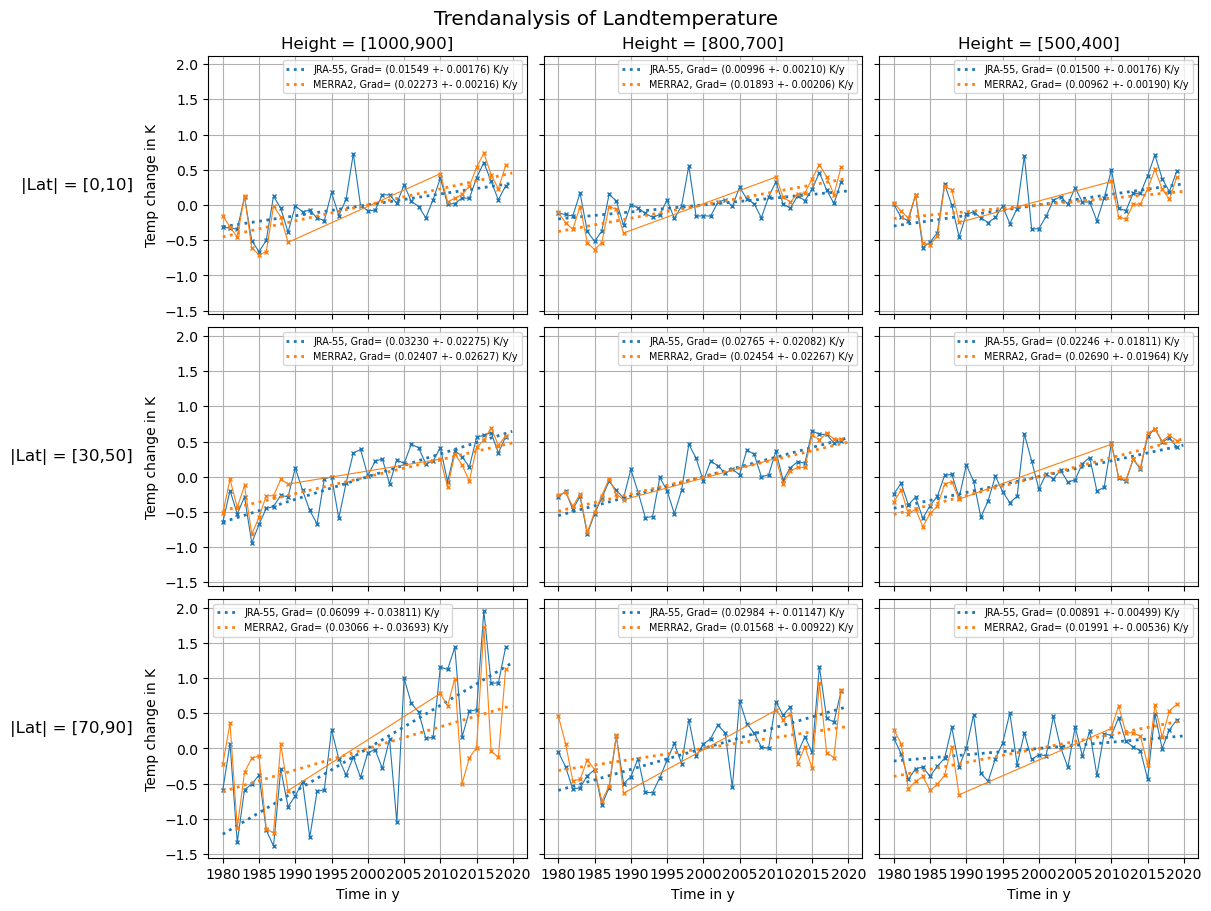

In [13]:
maketrendana(zones,heights,(DS1.ds.T.where(TOPO.land_mask_reindexed==True),DS2.ds.T.where(TOPO.land_mask_reindexed==True)),'Landtemperature', ['Temp',"K"],'K',(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 144.92 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 45.94 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 3.91 sms
Done with [70, 90],[1000, 900]
Done with [70, 90],[800, 700]
Done with [70, 90],[500, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 51.40 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 42.32 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 4

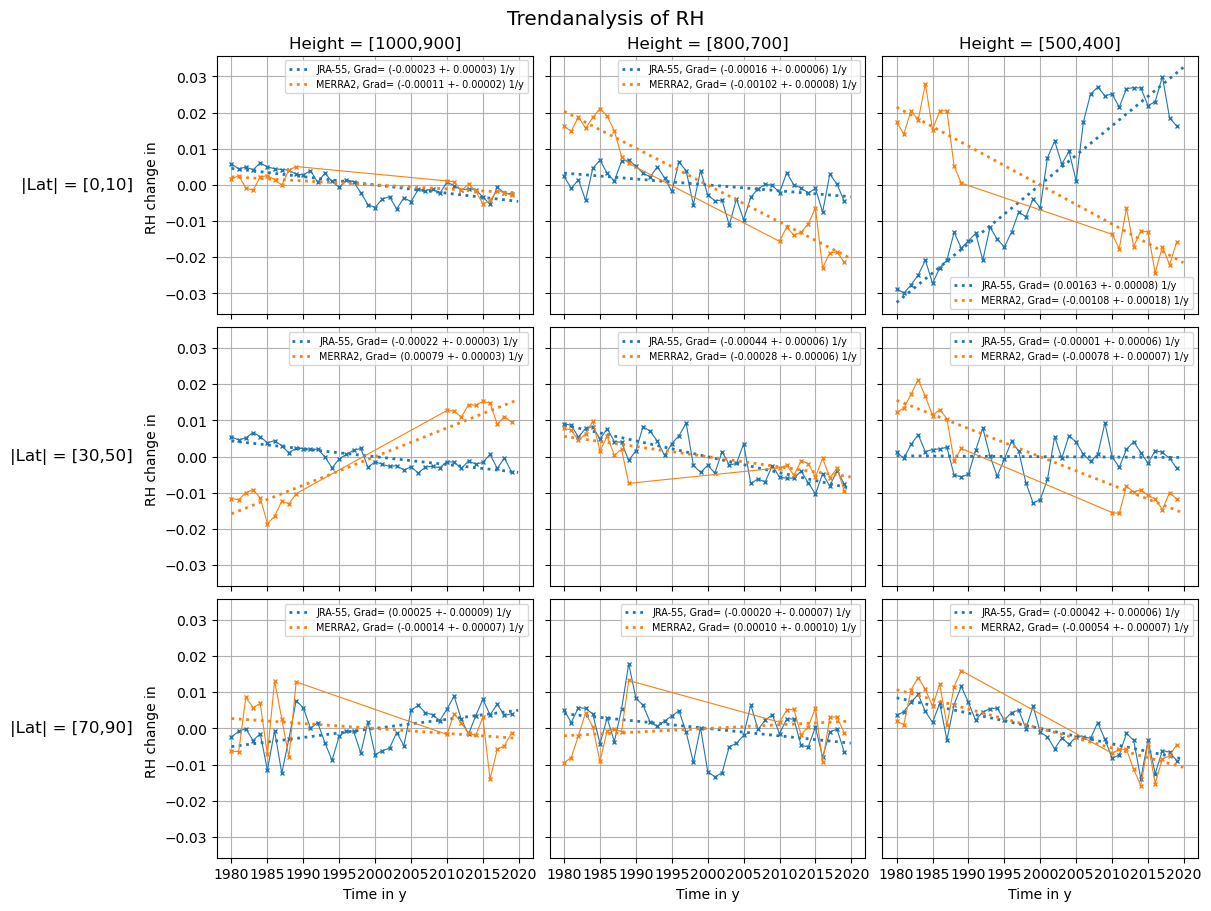

In [14]:
maketrendana(zones,heights,(DS1.ds.RH,DS2.ds.RH),'RH', ['RH',""],'1',(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 28.74 ss
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 4.65 sms
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 4.77 sms
Done with [70, 90],[1000, 900]
Done with [70, 90],[800, 700]
Done with [70, 90],[500, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 48.58 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 40.72 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 

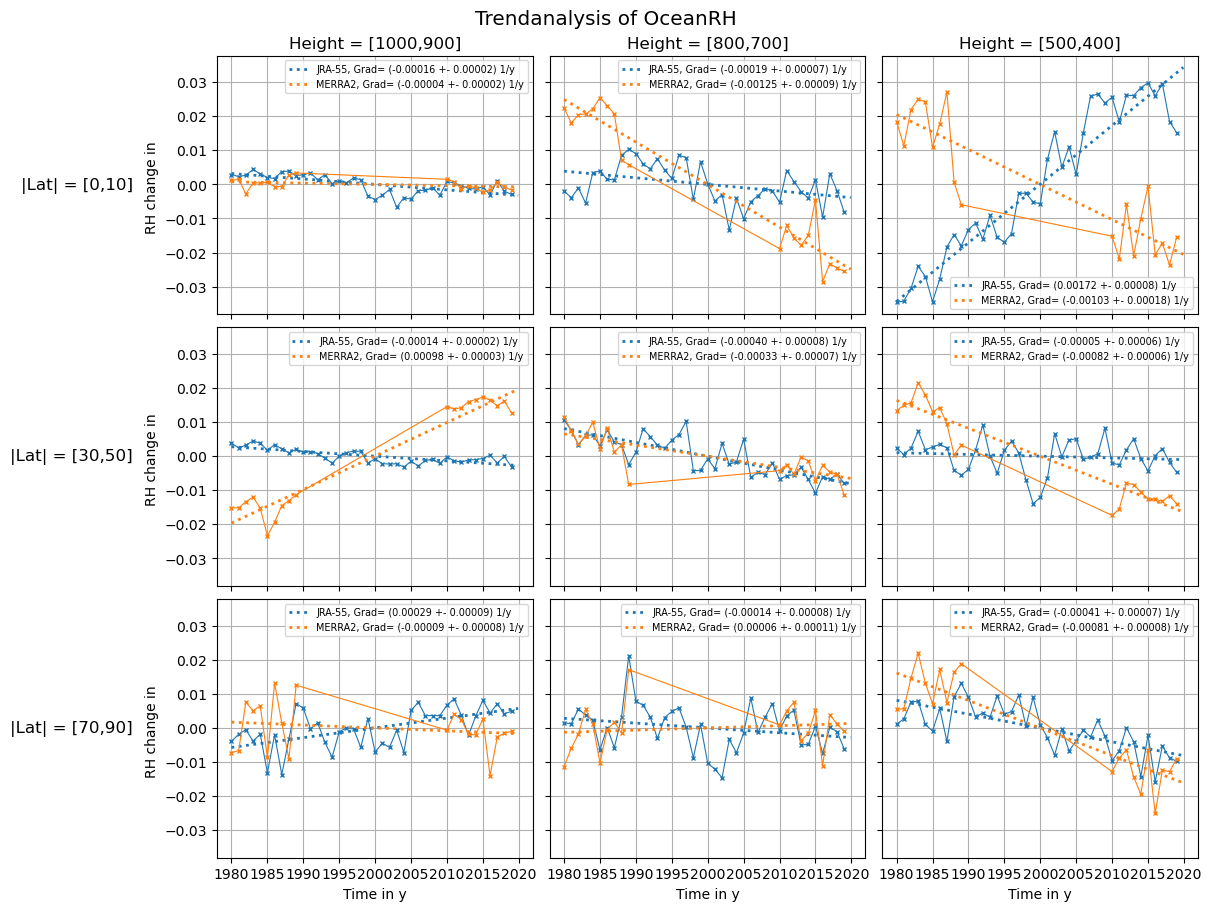

In [15]:
maketrendana(zones,heights,(DS1.ds.RH.where(TOPO.land_mask_reindexed==False),DS2.ds.RH.where(TOPO.land_mask_reindexed==False)),'OceanRH', ['RH',""],'1',(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 19.61 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 16.65 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 4.64 sms
Done with [70, 90],[1000, 900]
Done with [70, 90],[800, 700]
Done with [70, 90],[500, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 43.04 s
Done with [0, 10],[1000, 900]
Done with [0, 10],[800, 700]
Done with [0, 10],[500, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 39.55 s
Done with [30, 50],[1000, 900]
Done with [30, 50],[800, 700]
Done with [30, 50],[500, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 38

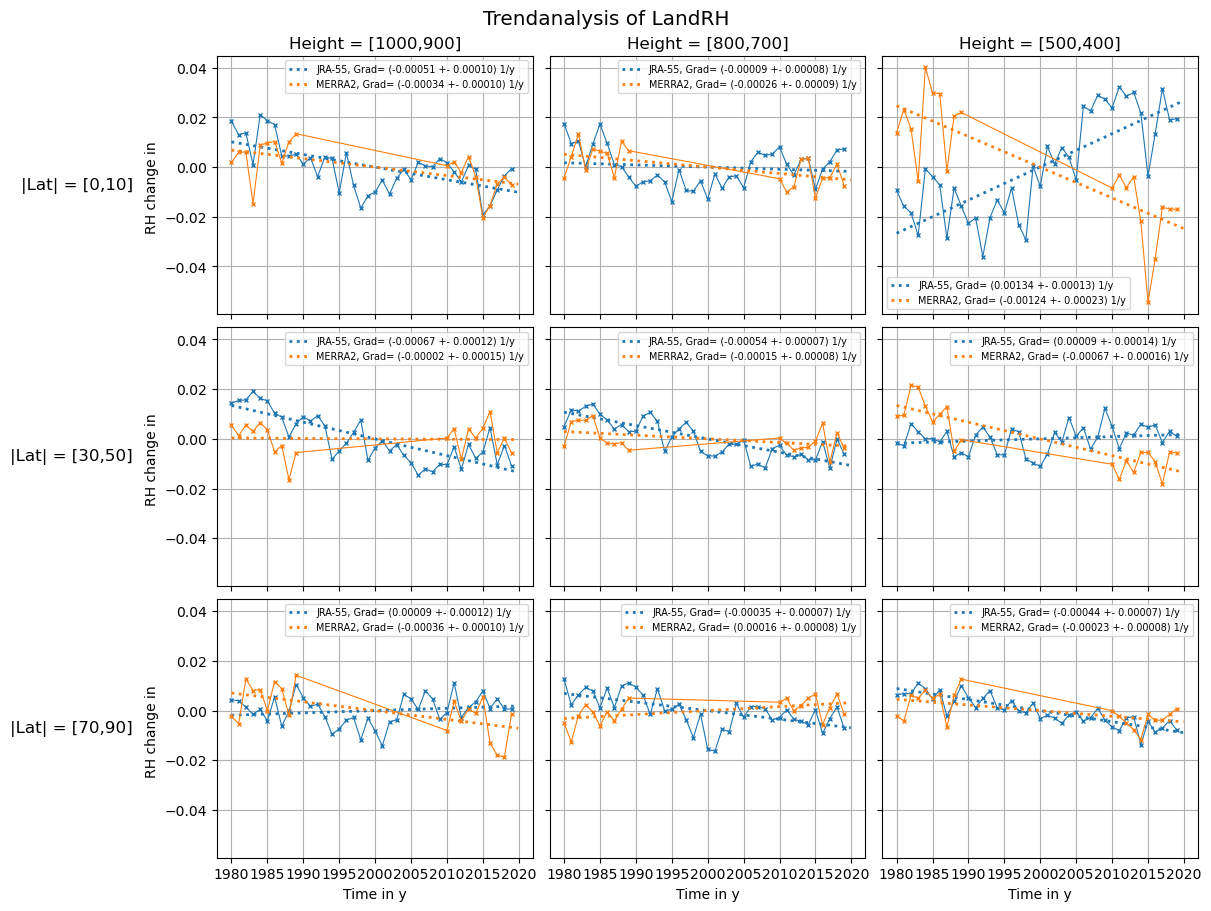

In [16]:
maketrendana(zones,heights,(DS1.ds.RH.where(TOPO.land_mask_reindexed==True),DS2.ds.RH.where(TOPO.land_mask_reindexed==True)),'LandRH', ['RH',""],'1',(DS1.setname,DS2.setname))

In [17]:
'''
Idee klappt leider nicht!

heights_T=[[10,15]]
fig, axes = startfig(zones,'Trendanalysis of Temperature')


for DS in (DS1,DS2):
  
        
    inr=0
    for i in zones:
        print(f"Process zone: {i}")
        with ProgressBar():
            Temp_raw=dask.compute(DS.ds.T.where((np.abs(DS.ds.lat) >= i[0]) & (np.abs(DS.ds.lat) <= i[1])))[0]
        
        for j in heights_T:
            
            
            print(f"Process height: {j}")
            with ProgressBar():
                Temp=dask.compute(Temp_raw.where(((DS.ds.T) >= j[0]) & ((DS.ds.T) <= j[1]) & ~np.isnan(Temp_raw.T)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("p","lon","lat")))[0]
                Temp=Temp-Temp.where(~np.isnan(Temp.T)).mean("time").to_numpy()

            
            
            Temp.attrs = DS.ds.T.attrs
            time_raw=Temp.time
            time_mon=time_raw.dt.month+12*time_raw.dt.year


            lin_para,dlin_para=so.curve_fit(lin,time_mon.where(~np.isnan(Temp.T)).to_numpy(),Temp.T.where(~np.isnan(Temp.T)).to_numpy())
            dlin_para=np.sqrt(dlin_para.diagonal())

            decimals=2
            
            lh, = axes[inr,1].plot(
                time_raw.to_numpy()[::12],
                year_mean(Temp).to_numpy(), 
                label=f"{DS.setname}, [{j[0]},{j[1]}]T",
                markersize=3, marker = "x", linestyle='-', linewidth = 0.8
            )

            axes[inr,1].plot(
                time_raw.to_numpy(),
                lin(time_mon.to_numpy(),*lin_para),
                label=f"Fit: grad= {12*lin_para[0]:.3f} +- {12*dlin_para[0]:.3f} K/y",
                color=lh.get_color(), linewidth = '2', linestyle='dotted',
            )
            
            axes[inr,1].legend(fontsize="x-small",
                              )
            
            print(f"Done with {i},{j}")
        
        inr=inr+1
        
    

fig.savefig(f"{RESLOC}{RESLOC_SPECIFIC}Temp_Timeseries.png")

plt.show()

endfig(fig, axes, 'Test.png')
'''

'\nIdee klappt leider nicht!\n\nheights_T=[[10,15]]\nfig, axes = startfig(zones,\'Trendanalysis of Temperature\')\n\n\nfor DS in (DS1,DS2):\n  \n        \n    inr=0\n    for i in zones:\n        print(f"Process zone: {i}")\n        with ProgressBar():\n            Temp_raw=dask.compute(DS.ds.T.where((np.abs(DS.ds.lat) >= i[0]) & (np.abs(DS.ds.lat) <= i[1])))[0]\n        \n        for j in heights_T:\n            \n            \n            print(f"Process height: {j}")\n            with ProgressBar():\n                Temp=dask.compute(Temp_raw.where(((DS.ds.T) >= j[0]) & ((DS.ds.T) <= j[1]) & ~np.isnan(Temp_raw.T)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("p","lon","lat")))[0]\n                Temp=Temp-Temp.where(~np.isnan(Temp.T)).mean("time").to_numpy()\n\n            \n            \n            Temp.attrs = DS.ds.T.attrs\n            time_raw=Temp.time\n            time_mon=time_raw.dt.month+12*time_raw.dt.year\n\n\n            lin_para,dlin_para=so.curve_fit(lin,time_mon.whe